## Push to Github

In [15]:
# Securely get the token
from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')

# Details
username = "AbdiR0099"
repo = "house-prices-advanced-regression-techniques"

# Clone the repository
!git clone https://{token}@github.com/{username}/{repo}.git

# Navigate into the new directory
%cd {repo}

Cloning into 'house-prices-advanced-regression-techniques'...
/content/house-prices-advanced-regression-techniques


In [23]:
# Move visualizations Folder to Current Location
!mv /content/visualizations .

In [22]:
# Check Working Directory
!pwd

/content/house-prices-advanced-regression-techniques


In [25]:
!git config --global user.email "arsaieed@gmail.com"
!git config --global user.name "AbdiR0099"

!git add .
!git commit -m "feat: Add Initial Work"
!git push origin main

[main (root-commit) 3a81ac8] feat: Add Initial Work
 5 files changed, 4904 insertions(+)
 create mode 100644 data/data_description.txt
 create mode 100644 data/sample_submission.csv
 create mode 100644 data/test.csv
 create mode 100644 data/train.csv
 create mode 100644 visualizations/top_10_null_values.png
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (9/9), done.
Writing objects: 100% (9/9), 235.19 KiB | 3.73 MiB/s, done.
Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), done.
To https://github.com/AbdiR0099/house-prices-advanced-regression-techniques.git
 * [new branch]      main -> main


##Libraries:

In [1]:
# Install Kaggle API client
!pip install -q kaggle  # Install silently to reduce console clutter

In [11]:
import os  # For directory and path operations
import shutil  # For file movement
import zipfile  # For extracting ZIP archives
from google.colab import files  # For uploading files to Colab environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Upload Kaggle API Key to Collab and Download Data

In [3]:


# Upload Kaggle API key
files.upload()  # Expects user to upload 'kaggle.json'

# Create directory for Kaggle credentials
os.makedirs("/root/.kaggle", exist_ok=True)  # Avoids error if directory already exists

# Move API key to correct location
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")  # Relocates file for API access

# Set appropriate file permissions
os.chmod("/root/.kaggle/kaggle.json", 0o600)  # Ensures only the owner can read/write

# Define constants for competition and data directory
COMPETITION_NAME = "house-prices-advanced-regression-techniques"  # Kaggle competition identifier
DATA_DIR = "/content/data"  # Local directory for storing dataset files

# Create data directory if it does not exist
os.makedirs(DATA_DIR, exist_ok=True)  # Ensures safe download location

# Download competition dataset using Kaggle API
!kaggle competitions download -c {COMPETITION_NAME} -p {DATA_DIR}  # Downloads ZIP file to specified path

# Extract dataset archive
with zipfile.ZipFile(os.path.join(DATA_DIR, f"{COMPETITION_NAME}.zip"), 'r') as zip_ref:
    zip_ref.extractall(DATA_DIR)  # Unpacks all contents into the data directory


Saving kaggle.json to kaggle.json
  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 527MB/s]


## Data Loading & Preprocessing

In [4]:
train_df = pd.read_csv(f"/content/data/train.csv")
test_df = pd.read_csv(f"/content/data/test.csv")
train_rows, train_cols = train_df.shape
test_rows, test_cols = test_df.shape

In [5]:
# Merge Data
df = pd.concat([train_df,test_df])
df.reset_index(drop = True, inplace= True)
df.shape

(2919, 81)

In [6]:
# Check for duplicates in the Merged Data
int(df.duplicated().sum())

0

In [8]:
def missing_summary(df,top_n=10):
    summary = pd.DataFrame({
        'Missing Count': df.isnull().sum(),
        'Missing %': (df.isnull().sum() / len(df)) * 100
    })
    return summary.sort_values(by='Missing Count', ascending=False).head(top_n)

In [9]:
def dataframe_overview(df,top_n=15):
  summary = pd.DataFrame({
      "Data Type" : df.dtypes,
      "Count" : df.count(),
      "Null Values" : df.isnull().sum(),
      "% Null Values": (df.isnull().sum() / len(df) * 100),
      "Unique Values": df.nunique()
  })
  return summary.sort_values(by = "% Null Values", ascending=False).head(top_n)

In [10]:
dataframe_overview(df,20)

,Data Type,Count,Null Values,% Null Values,Unique Values
PoolQC,object,10,2909,99.657417,3
MiscFeature,object,105,2814,96.402878,4
Alley,object,198,2721,93.216855,2
Fence,object,571,2348,80.438506,4
MasVnrType,object,1153,1766,60.500171,3
SalePrice,float64,1460,1459,49.982871,663
FireplaceQu,object,1499,1420,48.646797,5
LotFrontage,float64,2433,486,16.649538,128
GarageCond,object,2760,159,5.447071,5
GarageYrBlt,float64,2760,159,5.447071,103


/tmp/ipython-input-2387929138.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


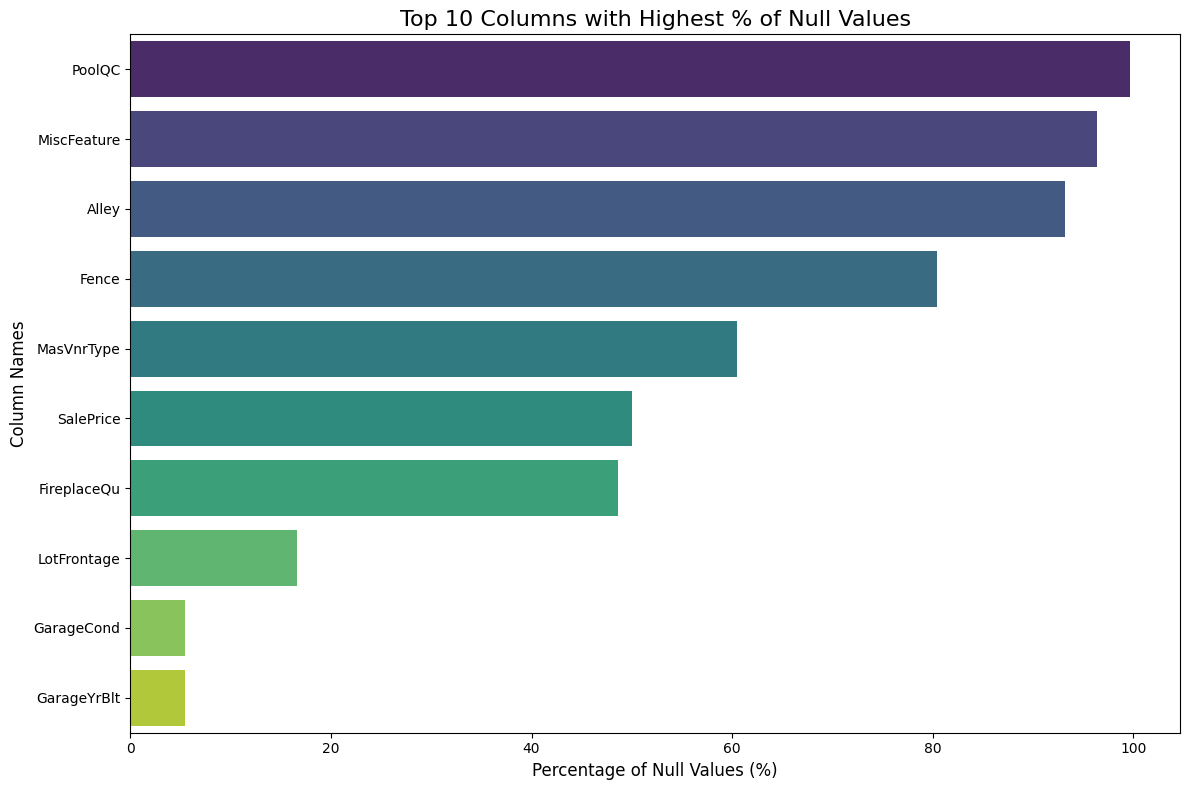

In [14]:
## Visualize

top_10_null = dataframe_overview(df,10)

plt.figure(figsize=(12,8))

sns.barplot(
    x = "% Null Values",
    y = top_10_null.index,
    data = top_10_null,
    palette="viridis"
)

# Title and Labels
plt.title("Top 10 Columns with Highest % of Null Values", fontsize = 16)
plt.xlabel("Percentage of Null Values (%)", fontsize = 12)
plt.ylabel("Column Names", fontsize= 12)

plt.tight_layout()

# Save the plot
plt.savefig("top_10_null_values.png")


###Handling Null Values:

In [ ]:
print(df['PoolQC'].unique())
print('')
print(df['PoolQC'].value_counts(ascending=False))

NameError: name 'df' is not defined

In [ ]:
#df["PoolQC"].fillna("NA",inplace=True)
values = {"PoolQC":"NA"}
df.fillna(value=values,inplace=True)

In [ ]:
df["Alley"].isnull().sum()

np.int64(2721)